# Análisis de los resultados de Elliot

En este *notebook* analizaremos los resultados obtenidos mediante la librería `Elliot`. Para ello, incluimos gráficas de métricas referentes a las valoraciones (*ratings*) que se predicen en todo el dataset y, por otro lado, la precisión (*accuracy*) de las $k$ recomendaciones, junto con métricas de cobertura (*coverage*), diversidad (*diversity*) y novedad (*novelty*) de las mismas.

## KNN Baseline (User-Item)

Para este modelo, se han creado perfiles de usuario a partir de los libros valorados y después se han buscado los libros más similares a cada perfil de usuario. Por tanto, se trata de un sistema recomendador KNN basado en contenido.

In [1]:
import os

# Ruta de resultados de evaluación para el modelo KNN
eval_knn_path = os.path.join(os.getcwd(), "../..", "elliot", "results", "knn")

### Evaluación de las recomendaciones

Se han realizado varios experimentos teniendo en cuenta el *cutoff* de recomendaciones. A la hora de obtener las recomendaciones, se ajustó en $k = 50$, pero también se incluyen datos para $k \in \{25, 10, 5\}$ correspondientes al resto de valores de *cutoff*.

In [2]:
import pandas as pd

# Ruta de resultados de evaluación de recomendaciones del modelo KNN
rec_eval_knn_path = eval_knn_path + "/user-item/"

# Pesos dados a la parte semántica
weights = [100, 80, 60, 40, 20, 0]

# Cutoffs
cutoffs = [50, 25, 10, 5]

# Leer los ficheros de resultados y juntar en un único dataframe (por cada cutoff)
eval_df_dict = {}
for cutoff in cutoffs:
    eval_df = pd.DataFrame()
    for weight in weights:
        df = pd.read_csv(rec_eval_knn_path + "cutoff_" + str(cutoff) + "_" + str(weight) + ".tsv", sep="\t")
        eval_df = pd.concat([eval_df, df], ignore_index=True)
    eval_df["model"] = weights
    eval_df.rename(columns={"model": "sem_weight"}, inplace=True)
    eval_df_dict[cutoff] = eval_df.copy()

# Cada uno de los dataframes con los resultados de evaluación para un cutoff
for cutoff in eval_df_dict:
    print("Cutoff:", cutoff)
    display(eval_df_dict[cutoff])

Cutoff: 50


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.020934,0.010029,0.024855,0.325733,0.013218,0.014660,0.059196,2056.0,0.152796,0.011684,0.026659
1,80,0.020657,0.009971,0.024612,0.330433,0.013195,0.014682,0.058869,1954.0,0.152184,0.011632,0.026890
2,60,0.019856,0.009693,0.023849,0.325633,0.012756,0.014258,0.056636,1892.0,0.146644,0.011225,0.026883
3,40,0.018398,0.009239,0.022618,0.318132,0.011622,0.013109,0.051483,1916.0,0.136316,0.010433,0.027869
4,20,0.014927,0.007775,0.019013,0.284628,0.009392,0.010762,0.040536,2004.0,0.110747,0.008498,0.028405
5,0,0.005124,0.003048,0.007305,0.139014,0.003191,0.003842,0.013371,2368.0,0.038871,0.003007,0.038477


Cutoff: 25


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.015955,0.011917,0.014846,0.216522,0.015576,0.009054,0.056122,1467.0,0.178759,0.013652,0.017656
1,80,0.015990,0.012241,0.015235,0.226423,0.015446,0.009001,0.055960,1389.0,0.180350,0.013787,0.018152
2,60,0.015298,0.011893,0.014710,0.224422,0.014780,0.008613,0.053765,1325.0,0.173297,0.013264,0.018291
3,40,0.013829,0.010937,0.013411,0.209921,0.013226,0.007753,0.048444,1355.0,0.157445,0.012028,0.018552
4,20,0.010997,0.009069,0.011050,0.180518,0.010483,0.006239,0.037637,1439.0,0.125564,0.009640,0.018405
5,0,0.003452,0.003256,0.003880,0.077208,0.003282,0.002048,0.011694,1776.0,0.040829,0.003147,0.026369


Cutoff: 10


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.015783,0.015672,0.007875,0.130613,0.018875,0.004873,0.050812,878.0,0.223601,0.017088,0.010037
1,80,0.015333,0.015332,0.007683,0.127813,0.018408,0.004683,0.049902,856.0,0.219285,0.016741,0.010557
2,60,0.014575,0.014661,0.007262,0.125113,0.017452,0.004401,0.047671,839.0,0.208349,0.015911,0.010936
3,40,0.012832,0.012831,0.006340,0.111411,0.015364,0.003859,0.042406,819.0,0.183236,0.013977,0.010672
4,20,0.009970,0.010501,0.005124,0.091609,0.011678,0.002972,0.032267,898.0,0.141955,0.010934,0.010971
5,0,0.002827,0.003440,0.001633,0.033703,0.003263,0.000889,0.009124,1192.0,0.041975,0.003228,0.016526


Cutoff: 5


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.017515,0.018722,0.004774,0.084308,0.021206,0.003105,0.044816,602.0,0.256820,0.019631,0.006843
1,80,0.016603,0.017602,0.004411,0.079308,0.020610,0.002931,0.043501,578.0,0.246505,0.018808,0.006993
2,60,0.015877,0.016982,0.004205,0.077408,0.019520,0.002765,0.041449,576.0,0.235472,0.017960,0.007281
3,40,0.014055,0.014861,0.003690,0.068907,0.017255,0.002428,0.036867,589.0,0.207215,0.015789,0.007264
4,20,0.010326,0.011241,0.002743,0.052005,0.012581,0.001747,0.027113,603.0,0.151478,0.011665,0.007670
5,0,0.002709,0.003540,0.000835,0.017502,0.003020,0.000457,0.007002,833.0,0.041759,0.003203,0.011670


#### Precisión

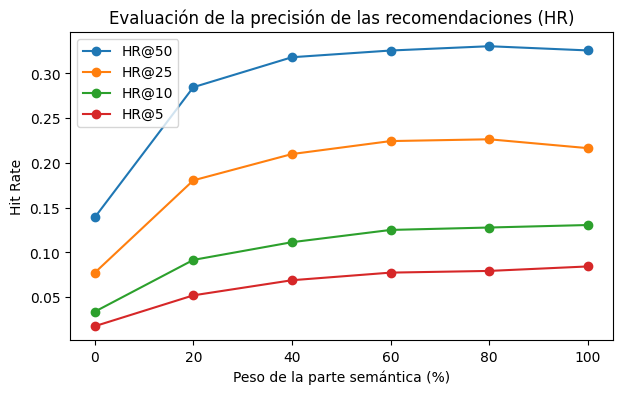

In [3]:
import matplotlib.pyplot as plt

# Gráfica de HR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["HR"], "o-", label="HR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Hit Rate")
ax.set_title("Evaluación de la precisión de las recomendaciones (HR)")
ax.legend()
plt.show()

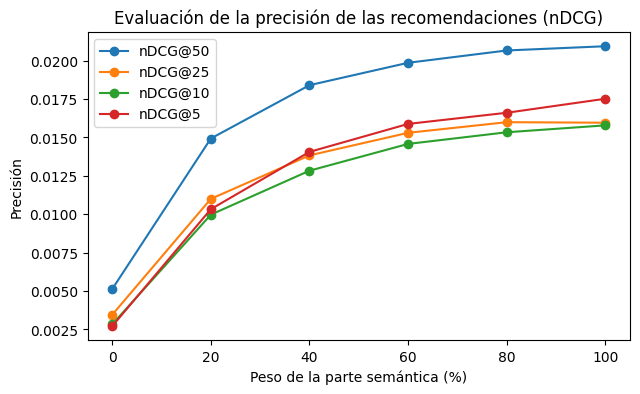

In [4]:
# Gráfica de nDCG para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["nDCG"], "o-", label="nDCG@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (nDCG)")
ax.legend()
plt.show()

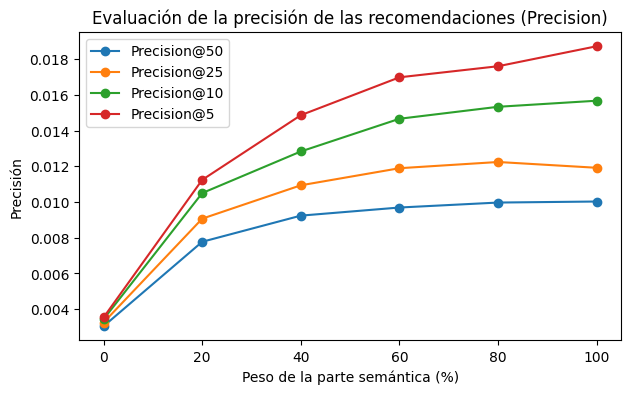

In [5]:
# Gráfica de Precision para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Precision"], "o-", label="Precision@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Precision)")
ax.legend()
plt.show()

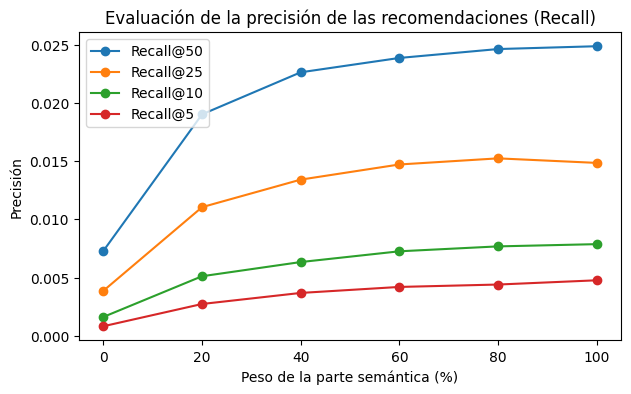

In [6]:
# Gráfica de Recall para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Recall"], "o-", label="Recall@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Recall)")
ax.legend()
plt.show()

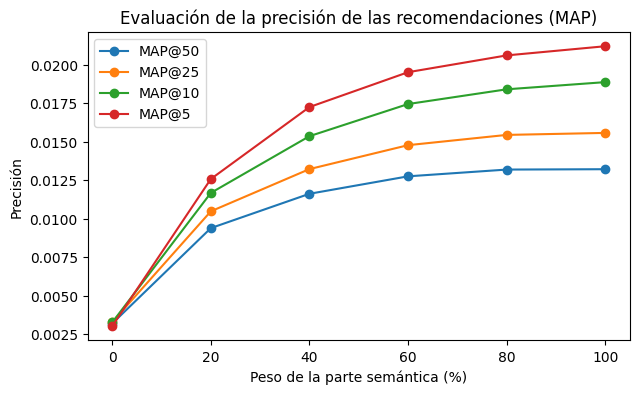

In [7]:
# Gráfica de MAP para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAP"], "o-", label="MAP@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAP)")
ax.legend()
plt.show()

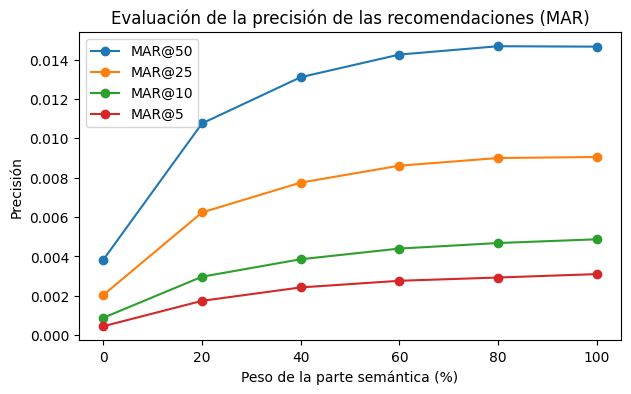

In [8]:
# Gráfica de MAR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAR"], "o-", label="MAR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAR)")
ax.legend()
plt.show()

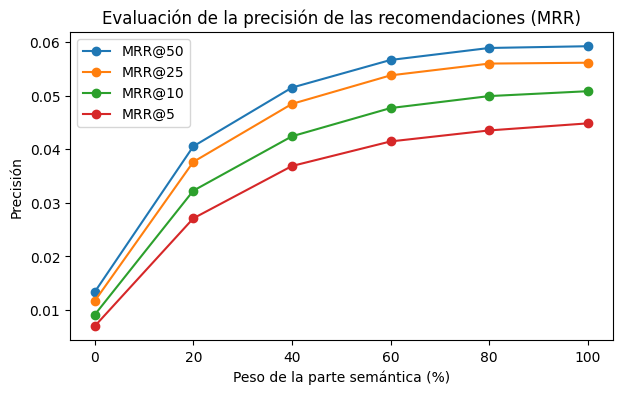

In [9]:
# Gráfica de MRR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MRR"], "o-", label="MRR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MRR)")
ax.legend()
plt.show()

<span style="color:red">Pendiente de analizar.</span>

#### Cobertura

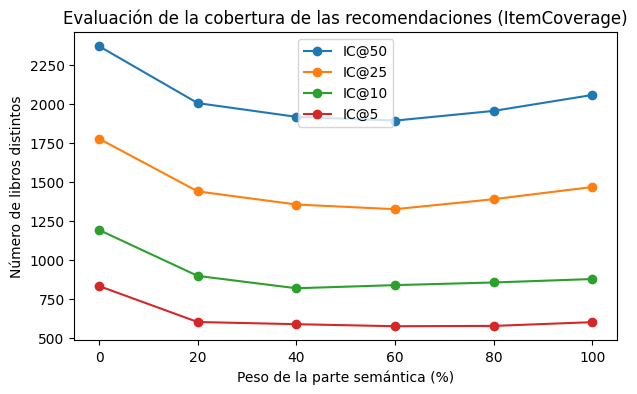

In [10]:
# Gráfica de ItemCoverage para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["ItemCoverage"], "o-", label="IC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Número de libros distintos")
ax.set_title("Evaluación de la cobertura de las recomendaciones (ItemCoverage)")
ax.legend()
plt.show()

#### Novedad

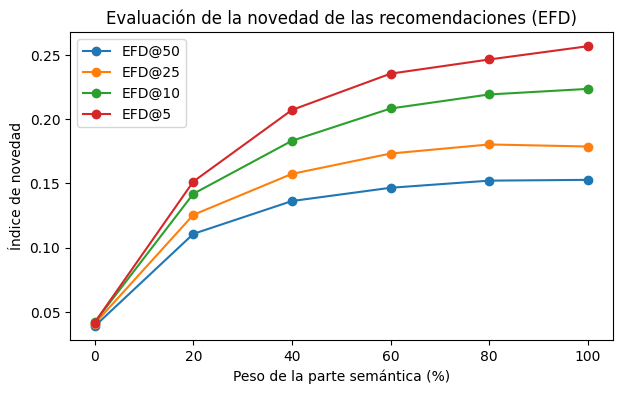

In [11]:
# Gráfica de EFD para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EFD"], "o-", label="EFD@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EFD)")
ax.legend()
plt.show()

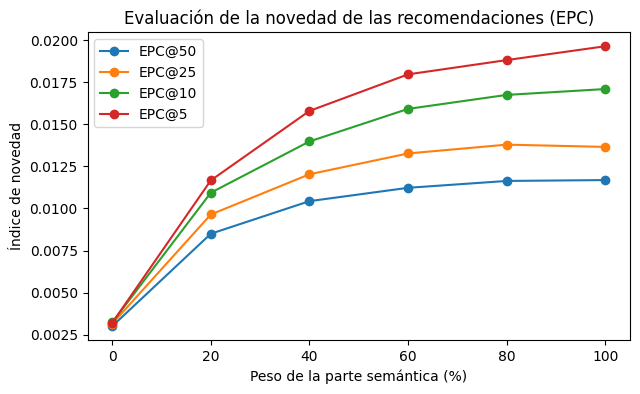

In [12]:
# Gráfica de EPC para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EPC"], "o-", label="EPC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EPC)")
ax.legend()
plt.show()

#### Diversidad

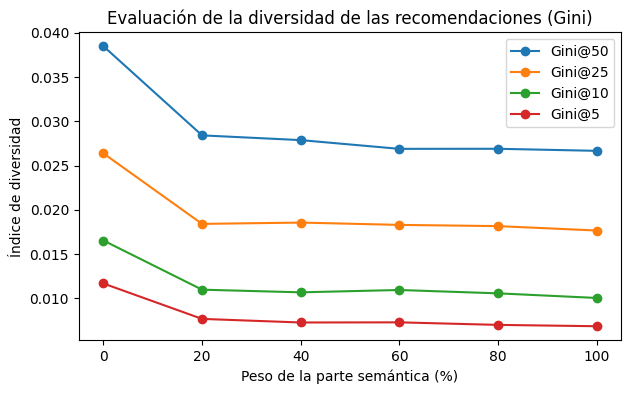

In [13]:
# Gráfica de Gini para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Gini"], "o-", label="Gini@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de diversidad")
ax.set_title("Evaluación de la diversidad de las recomendaciones (Gini)")
ax.legend()
plt.show()

## KNN Baseline (User-User)

En este caso, el modelo evaluado se trata de un KNN híbrido entre *content-based* y *collaborative filtering*. Por un lado, está basado en contenido ya que los perfiles de usuario se construyen sobre los *embeddings* semánticos y de *sentiment analysis* de los libros que han valorado. Además, incorpora filtrado colaborativo ya que a partir de los usuarios con perfiles más parecidos, se recomiendan libros que estos han valorado y que el usuario no habría leído.

### Evaluación de las recomendaciones

Para las recomendaciones se han tenido en cuenta los 15 perfiles de usuario más parecidos a cada uno de los usuarios del dataset de test. 

Se han realizado varios experimentos teniendo en cuenta el *cutoff* de recomendaciones. A la hora de obtener las recomendaciones, se ajustó en $k = 50$, pero también se incluyen datos para $k \in \{25, 10, 5\}$ correspondientes al resto de valores de *cutoff*. Asimismo, se ha ido variando la ponderación entre los vectores semántico y *sentiment* para pesos $w \in \{0.0, 0.2, 0.4, 0.6, 0.8, 1.0\}$.

In [15]:
# Ruta de resultados de evaluación de recomendaciones del modelo KNN
rec_eval_knn_path = eval_knn_path + "/user-user/"

# Pesos dados a la parte semántica
weights = [100, 80, 60, 40, 20, 0]

# Cutoffs
cutoffs = [50, 25, 10, 5]

# Leer los ficheros de resultados y juntar en un único dataframe (por cada cutoff)
eval_df_dict = {}
for cutoff in cutoffs:
    eval_df = pd.DataFrame()
    for weight in weights:
        df = pd.read_csv(rec_eval_knn_path + "cutoff_" + str(cutoff) + "_" + str(weight) + ".tsv", sep="\t")
        eval_df = pd.concat([eval_df, df], ignore_index=True)
    eval_df["model"] = weights
    eval_df.rename(columns={"model": "sem_weight"}, inplace=True)
    eval_df_dict[cutoff] = eval_df.copy()

# Cada uno de los dataframes con los resultados de evaluación para un cutoff
for cutoff in eval_df_dict:
    print("Cutoff:", cutoff)
    display(eval_df_dict[cutoff])

Cutoff: 50


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.226704,0.096942,0.233083,0.961996,0.151151,0.151948,0.476912,6156.0,1.296361,0.111669,0.105571
1,80,0.226497,0.096932,0.232893,0.963896,0.150940,0.151871,0.477629,6132.0,1.294866,0.111562,0.105038
2,60,0.224181,0.096270,0.231474,0.963896,0.149540,0.150704,0.470713,6157.0,1.282111,0.110499,0.104598
3,40,0.219615,0.094417,0.227047,0.962796,0.146580,0.148023,0.463275,6151.0,1.254590,0.108196,0.104384
4,20,0.209886,0.091181,0.219213,0.958396,0.139932,0.142076,0.443963,6172.0,1.195172,0.103291,0.103627
5,0,0.140512,0.063502,0.151410,0.888989,0.093480,0.095753,0.322008,6502.0,0.769897,0.067901,0.098788


Cutoff: 25


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.191690,0.133041,0.160687,0.908291,0.190827,0.103357,0.475329,4317.0,1.665013,0.143998,0.071322
1,80,0.191812,0.133329,0.161200,0.909091,0.190272,0.103049,0.476042,4316.0,1.664550,0.143988,0.071287
2,60,0.189239,0.131761,0.159199,0.908691,0.188263,0.102027,0.469087,4302.0,1.642667,0.142144,0.070926
3,40,0.185492,0.129269,0.156588,0.905591,0.184542,0.100380,0.461577,4319.0,1.608165,0.139211,0.070302
4,20,0.176508,0.124376,0.150210,0.898190,0.175103,0.095502,0.442200,4283.0,1.525282,0.132323,0.069176
5,0,0.115496,0.083928,0.100588,0.788079,0.114917,0.062687,0.319068,4204.0,0.955680,0.084661,0.058324


Cutoff: 10


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.205636,0.191769,0.093602,0.780678,0.244176,0.060019,0.466932,2688.0,2.184233,0.189497,0.045967
1,80,0.204605,0.190419,0.092871,0.781078,0.243298,0.059639,0.467578,2719.0,2.173886,0.188592,0.045989
2,60,0.202803,0.189889,0.092719,0.778978,0.240615,0.059172,0.460663,2691.0,2.155654,0.187032,0.045828
3,40,0.198328,0.185979,0.090883,0.774377,0.235343,0.057984,0.453011,2662.0,2.106157,0.182848,0.044938
4,20,0.187128,0.176148,0.085942,0.758576,0.221653,0.054540,0.433068,2644.0,1.973894,0.171794,0.043148
5,0,0.120300,0.115532,0.055768,0.610761,0.144016,0.035207,0.307720,2255.0,1.207382,0.107285,0.030621


Cutoff: 5


,sem_weight,nDCG,Precision,Recall,HR,MAP,MAR,MRR,ItemCoverage,EFD,EPC,Gini
0,100,0.236589,0.240024,0.059087,0.651365,0.280406,0.039425,0.449423,1907.0,2.557590,0.222301,0.034708
1,80,0.235642,0.239044,0.058806,0.652065,0.279600,0.039237,0.450292,1877.0,2.551356,0.221718,0.034388
2,60,0.232526,0.236604,0.058246,0.647765,0.275824,0.038734,0.443056,1883.0,2.516865,0.218758,0.034418
3,40,0.227030,0.231323,0.056895,0.638364,0.269302,0.037850,0.434702,1855.0,2.457891,0.213694,0.033697
4,20,0.213215,0.217202,0.053257,0.616362,0.252950,0.035391,0.413946,1875.0,2.288649,0.199464,0.032124
5,0,0.136605,0.142294,0.034505,0.465547,0.163502,0.022701,0.288255,1456.0,1.392788,0.123895,0.020558


#### Precisión

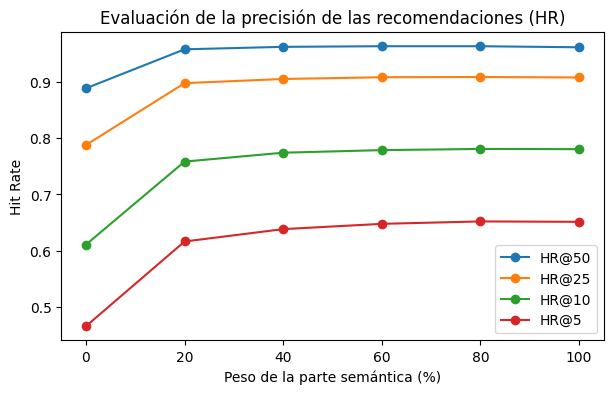

In [16]:
# Gráfica de HR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["HR"], "o-", label="HR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Hit Rate")
ax.set_title("Evaluación de la precisión de las recomendaciones (HR)")
ax.legend()
plt.show()

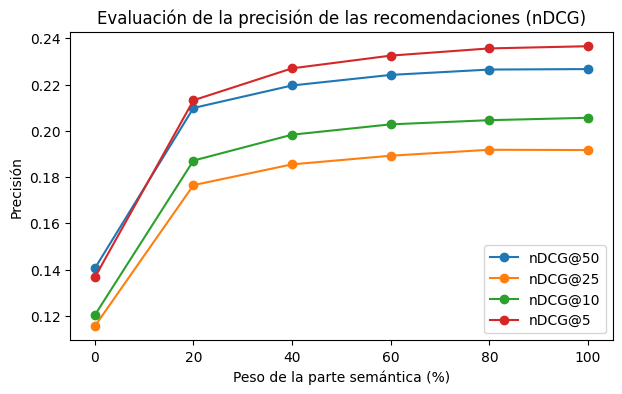

In [17]:
# Gráfica de nDCG para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["nDCG"], "o-", label="nDCG@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (nDCG)")
ax.legend()
plt.show()

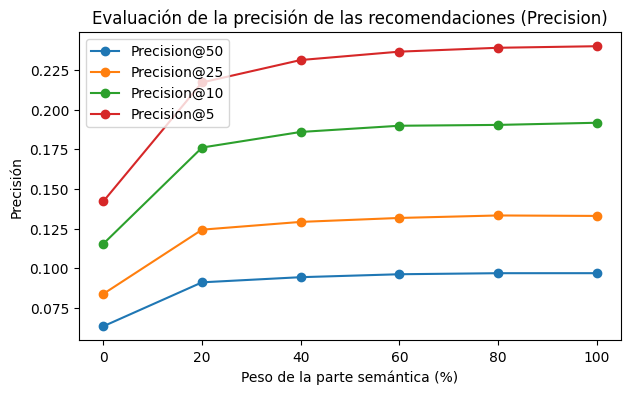

In [18]:
# Gráfica de Precision para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Precision"], "o-", label="Precision@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Precision)")
ax.legend()
plt.show()

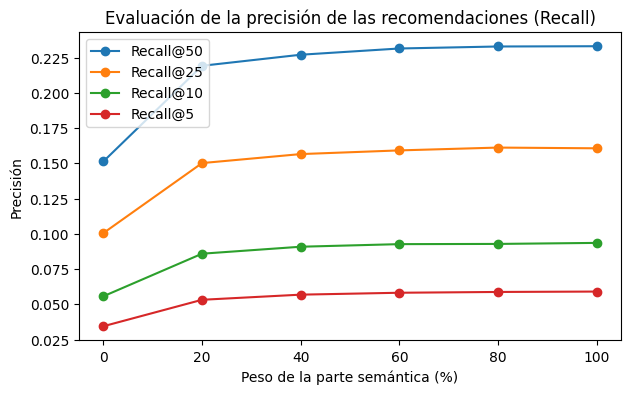

In [19]:
# Gráfica de Recall para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Recall"], "o-", label="Recall@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (Recall)")
ax.legend()
plt.show()

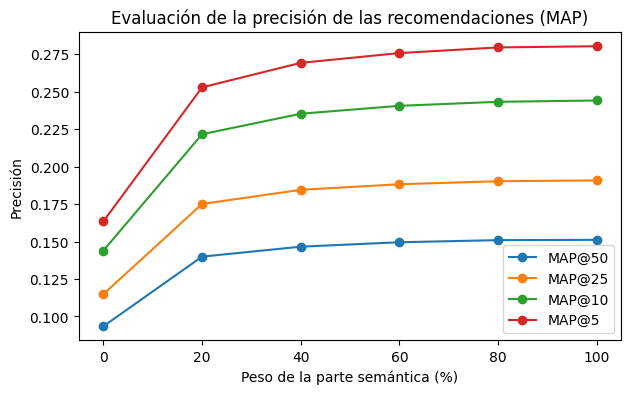

In [20]:
# Gráfica de MAP para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAP"], "o-", label="MAP@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAP)")
ax.legend()
plt.show()

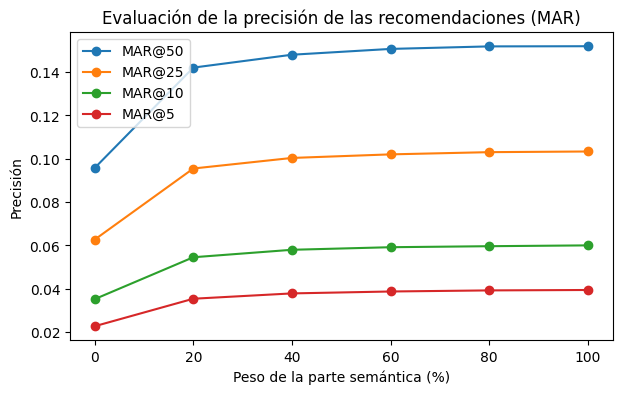

In [21]:
# Gráfica de MAR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MAR"], "o-", label="MAR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MAR)")
ax.legend()
plt.show()

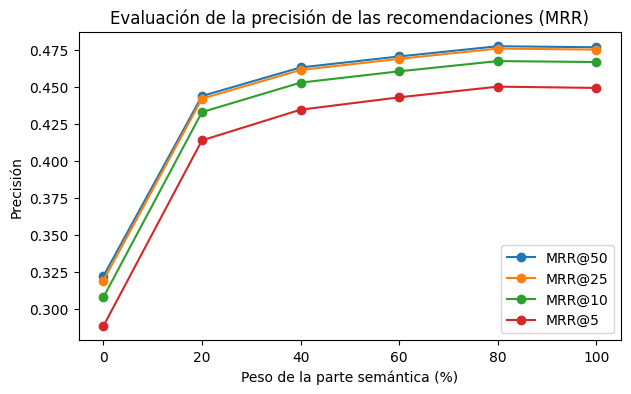

In [22]:
# Gráfica de MRR para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["MRR"], "o-", label="MRR@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Precisión")
ax.set_title("Evaluación de la precisión de las recomendaciones (MRR)")
ax.legend()
plt.show()

<span style="color:red">Pendiente de analizar.</span>

#### Cobertura

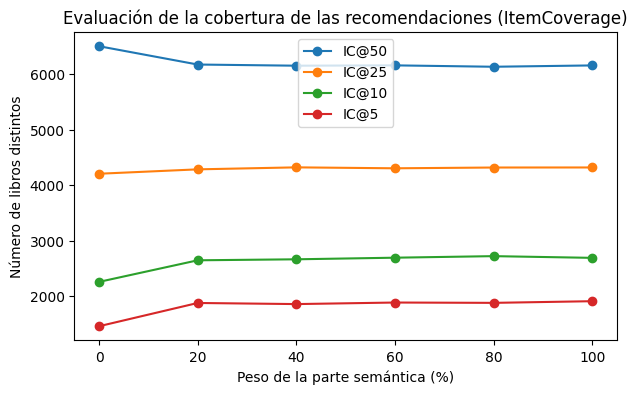

In [23]:
# Gráfica de ItemCoverage para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["ItemCoverage"], "o-", label="IC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Número de libros distintos")
ax.set_title("Evaluación de la cobertura de las recomendaciones (ItemCoverage)")
ax.legend()
plt.show()

#### Novedad

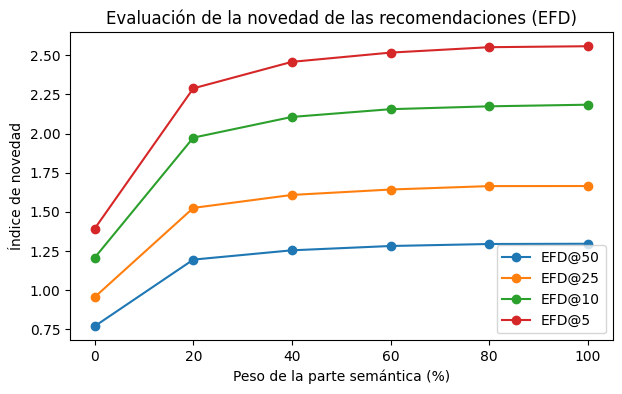

In [24]:
# Gráfica de EFD para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EFD"], "o-", label="EFD@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EFD)")
ax.legend()
plt.show()

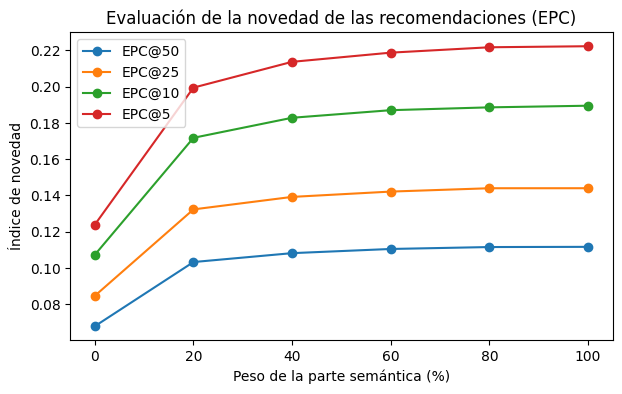

In [25]:
# Gráfica de EPC para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["EPC"], "o-", label="EPC@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de novedad")
ax.set_title("Evaluación de la novedad de las recomendaciones (EPC)")
ax.legend()
plt.show()

#### Diversidad

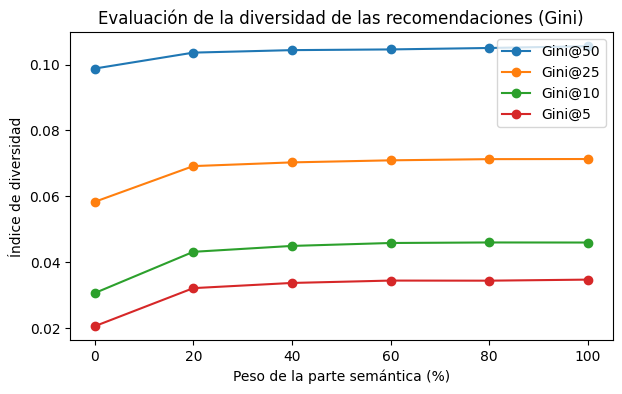

In [26]:
# Gráfica de Gini para cada cutoff en función del peso de la parte semántica
fig, ax = plt.subplots(figsize=(7, 4))
for cutoff in eval_df_dict:
    eval_df = eval_df_dict[cutoff]
    ax.plot(eval_df["sem_weight"], eval_df["Gini"], "o-", label="Gini@" + str(cutoff))
ax.set_xlabel("Peso de la parte semántica (%)")
ax.set_ylabel("Índice de diversidad")
ax.set_title("Evaluación de la diversidad de las recomendaciones (Gini)")
ax.legend()
plt.show()